### Step 1: Generate the Dataset

In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate date range
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')

# Generate random data
data = {
    'date': date_range,
    'sales': np.random.poisson(lam=200, size=len(date_range)),  # average daily sales
    'marketing_spend': np.random.normal(loc=1000, scale=200, size=len(date_range)),  # daily marketing spend
    'new_customers': np.random.poisson(lam=20, size=len(date_range)),  # daily new customers
    'website_visits': np.random.normal(loc=3000, scale=500, size=len(date_range)),  # daily website visits
    'ad_clicks': np.random.normal(loc=1500, scale=300, size=len(date_range))  # daily ad clicks
}

# Create DataFrame
df = pd.DataFrame(data)

# Ensure no negative values
df['marketing_spend'] = df['marketing_spend'].clip(lower=0)
df['website_visits'] = df['website_visits'].clip(lower=0)
df['ad_clicks'] = df['ad_clicks'].clip(lower=0)

df.head()


,date,sales,marketing_spend,new_customers,website_visits,ad_clicks
0,2022-01-01,195,957.311426,13,3488.907775,1648.219176
1,2022-01-02,210,1298.145227,20,1947.176529,643.612001
2,2022-01-03,184,1029.733491,22,3576.795172,1242.944440
3,2022-01-04,204,932.582806,23,3693.174699,1162.183812
4,2022-01-05,216,877.319467,30,2848.909707,1423.097796


### Step 2: Visualize the Data

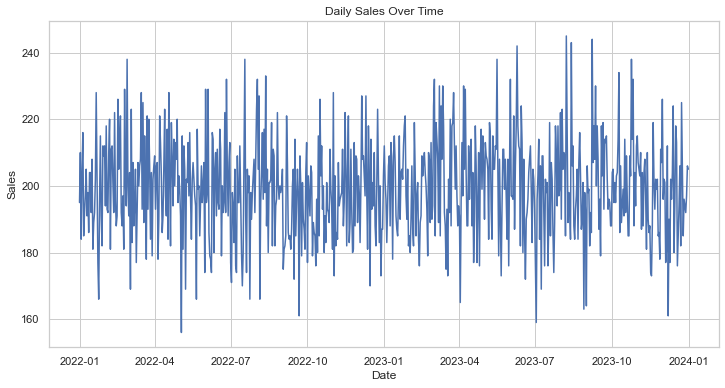

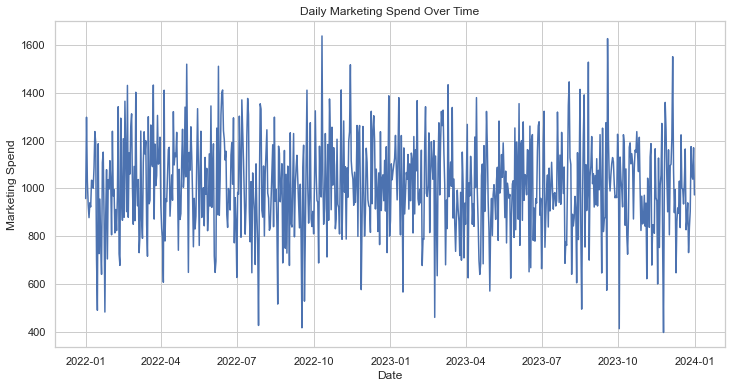

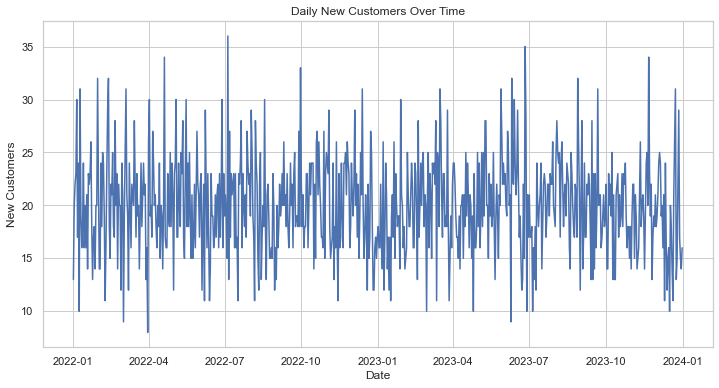

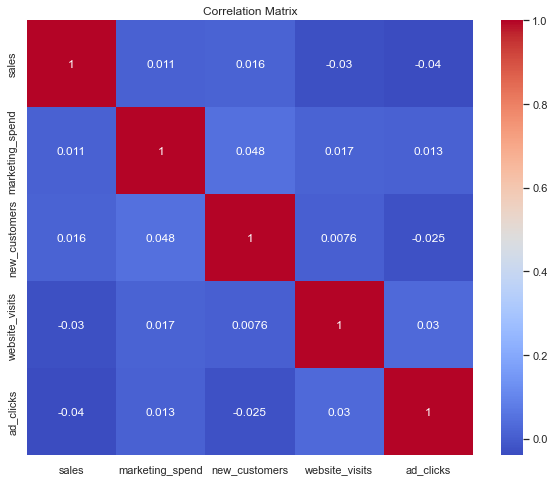

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=df)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot marketing spend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='marketing_spend', data=df)
plt.title('Daily Marketing Spend Over Time')
plt.xlabel('Date')
plt.ylabel('Marketing Spend')
plt.show()

# Plot new customers over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_customers', data=df)
plt.title('Daily New Customers Over Time')
plt.xlabel('Date')
plt.ylabel('New Customers')
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[['sales', 'marketing_spend', 'new_customers', 'website_visits', 'ad_clicks']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Step 3: Build a Predictive Model

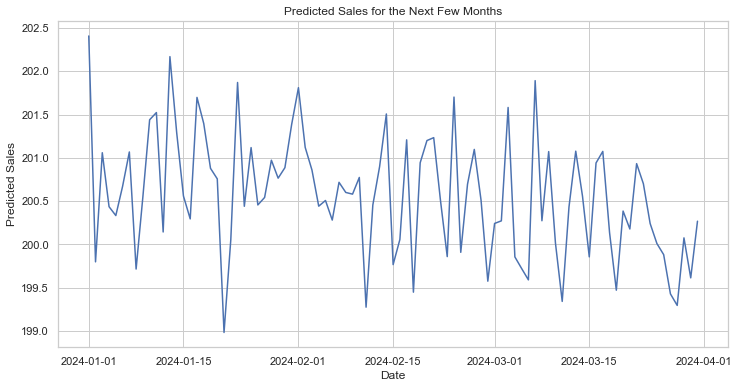

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Prepare the data
df['day_of_year'] = df['date'].dt.dayofyear
X = df[['day_of_year', 'marketing_spend', 'new_customers', 'website_visits', 'ad_clicks']]
y = df['sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Forecast for the next few months
future_dates = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')
future_df = pd.DataFrame({
    'date': future_dates,
    'day_of_year': future_dates.dayofyear,
    'marketing_spend': np.random.normal(loc=1000, scale=200, size=len(future_dates)),
    'new_customers': np.random.poisson(lam=20, size=len(future_dates)),
    'website_visits': np.random.normal(loc=3000, scale=500, size=len(future_dates)),
    'ad_clicks': np.random.normal(loc=1500, scale=300, size=len(future_dates))
})

# Ensure no negative values
future_df['marketing_spend'] = future_df['marketing_spend'].clip(lower=0)
future_df['website_visits'] = future_df['website_visits'].clip(lower=0)
future_df['ad_clicks'] = future_df['ad_clicks'].clip(lower=0)

# Predict future sales
future_X = future_df[['day_of_year', 'marketing_spend', 'new_customers', 'website_visits', 'ad_clicks']]
future_df['predicted_sales'] = model.predict(future_X)

# Plot future sales predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='predicted_sales', data=future_df)
plt.title('Predicted Sales for the Next Few Months')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.show()
